In [1]:
import os
import gzip
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPool2D, Flatten, Activation, MaxPooling2D

Using TensorFlow backend.


In [2]:
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
#Reading the data
images_train, labels_train = load_mnist('C:\\UB\\ML 574\\Python\\DataSets\\data\\fashion', kind='train')
images_test, labels_test = load_mnist('C:\\UB\\ML 574\\Python\\DataSets\\data\\fashion', kind='t10k')
images_train=np.asmatrix(images_train)
images_test=np.asmatrix(images_test)
labels_train=np.reshape(labels_train,(60000,1))

In [4]:
#Normalizing the Data
images_train=images_train/255;
images_test=images_test/255;

In [5]:
#Applying K-Encoding Scheme for Labels
y_encoded=np.zeros((labels_train.shape[0],10))
for i in range(labels_train.shape[0]):
    y_encoded[i,labels_train[i]]=1
y_test_encoded=np.zeros((labels_test.shape[0],10))
for i in range(labels_test.shape[0]):
    y_test_encoded[i,labels_test[i]]=1

In [6]:
#Dividing Data in batch
images_batch=np.split(images_train,120);
labels_train_batch=np.split(labels_train,120);
labels_batch=np.split(y_encoded,120)

In [7]:
#Sigmoid Function
def sigmoidFunction(z):
    return 1/(1+np.exp(-z))

In [8]:
#Softmax Function
def softmaxFunction(z):
    temp=np.exp(z)
    total_val=np.sum(temp,axis=1)
    a=temp/total_val
    return a

In [9]:
#Hypothesis
def hypothesis(x,w,bias):
    wx=np.dot(x,w)+bias
    return wx;

In [10]:
#Categorical Cross Entropy as Loss Fucntion
def lossFunction(a2,y):
    m=y.shape[0]
    error=np.multiply(y,sc.log(a2))
    loss=(-1/m)*error
    return np.sum(loss)

In [11]:
#Back Propagation for the Second Layer
def gradDescentFirst(y_pred,y,w1,b1,w2,a1,learning_rate,x):
    m=x.shape[0]
    temp1=np.dot((y_pred-y),w2.T)
    temp2=np.multiply(a1,(1-a1))
    temp3=np.multiply(temp1,temp2)
    dw1=(1/m)*np.dot(x.T,temp3)
    db1=(1/m)*np.sum(np.multiply(temp1,temp2),axis=0)
    w1=w1-learning_rate*dw1
    b1=b1-learning_rate*db1
    return w1,b1

In [12]:
#Back Propagation for the First Layer
def gradDescentSecond(y_pred,y,w2,b2,a1,learning_rate):
    diff=y_pred-y
    m=a1.shape[0]
    dw2=(1/m)*np.dot(a1.T,diff)
    db2=(1/m)*np.sum(np.dot(a1.T,diff),axis=0)
    w2=w2-learning_rate*dw2
    b2=b2-learning_rate*db2
    return w2,b2

In [13]:
#Calculating Max Probabilty for Output Matrix
def max_probability(a2):
    result=np.argmax(a2,axis=1)
    return result

In [14]:
#Calculating Accuracy
def cal_accuracy(y,y_pred):
    count=0
    for i in range(y.shape[0]):
        if(y_pred[i]==y[i]):
            count=count+1
    accuracy=(count/y.shape[0])*100
    return accuracy

In [15]:
#Initialization of Weights , Bias and Hyper parameters
layer1=[80]
cost_graph=[]
acc_graph=[]
outputLayer=10
epoch=100
learning_Rate=0.2

w1=np.random.randn(images_batch[0].shape[1],layer1[0])
b1=np.random.randn(1,layer1[0])
w2=np.random.randn(layer1[0],outputLayer)
b2=np.random.randn(1,outputLayer)

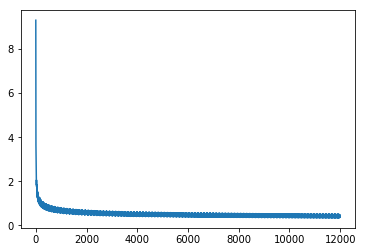

In [16]:
#Training our Model
for i in range(epoch):
    for j in range(len(images_batch)):
         z1=hypothesis(images_batch[j],w1,b1)
         a1=sigmoidFunction(z1)
         z2=hypothesis(a1,w2,b2) 
         a2=softmaxFunction(z2)
         cost=lossFunction(a2,labels_batch[j])
         result=max_probability(a2)
         cost_graph.append((cost))
         accuracy=cal_accuracy(labels_train_batch[j],result)
         acc_graph.append(accuracy)
         w1,b1=gradDescentFirst(a2,labels_batch[j],w1,b1,w2,a1,learning_Rate,images_batch[j])
         w2,b2=gradDescentSecond(a2,labels_batch[j],w2,b2,a1,learning_Rate)
plt.plot(cost_graph)

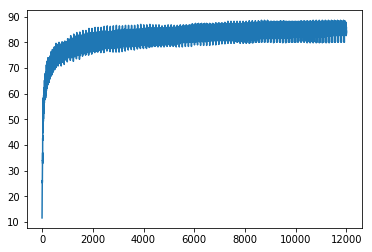

In [17]:
plt.plot(acc_graph)

In [18]:
#Calculation of Confusion Matrix and Accuracy on Test Data
test_z1=hypothesis(images_test,w1,b1)
test_a1=sigmoidFunction(test_z1)
test_z2=hypothesis(test_a1,w2,b2)
test_a2=softmaxFunction(test_z2)
result=np.ones((10000,1))

result=np.argmax(test_a2,axis=1)

labels_test=np.asmatrix(labels_test)
labels_test=np.reshape(labels_test,(10000,1))
count=0
for i in range(result.shape[0]):
    if(labels_test[i]==result[i]):
        count=count+1
print(count)

8287
[[819   7  16  52   7   0  83   0  16   0]
 [  8 942   9  27   7   1   3   0   2   1]
 [ 21   3 704  12 181   0  68   0  11   0]
 [ 38  19  14 860  43   0  20   0   6   0]
 [  1   2  96  41 806   2  44   0   8   0]
 [  2   1   0   0   0 904   0  54   6  33]
 [195   2 134  41 146   1 454   0  27   0]
 [  0   0   0   0   0  41   0 901   2  56]
 [  3   1  13   5   9   6  13   4 943   3]
 [  1   0   0   0   0  16   0  28   1 954]]


In [ ]:
#Creating Confusion Matrix
cm=confusion_matrix(labels_test,result)
print(cm)

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 23us/step


C:\Users\akash\Anaconda3\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


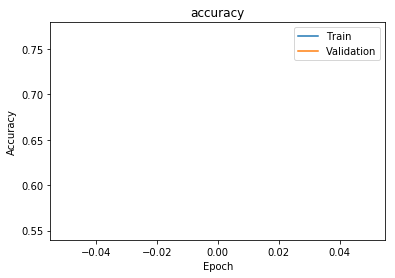

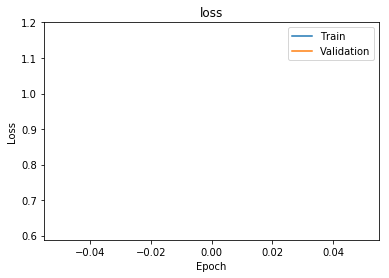

[0.64333003461360927, 0.75769999623298645]


In [26]:
#Building a multi-layer Neural Network with open-source neural-network library, Keras
#Training the Model
model = Sequential()

model.add(Dense(128, activation='sigmoid', input_dim=784))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.1,decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history=model.fit(images_train, y_encoded,epochs=100,validation_split=0.1,batch_size=500)
score = model.evaluate(images_test,y_test_encoded, batch_size=500)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='bottom right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
print(score)


In [30]:
#Creating Confusion Matrix
result = model.predict(images_test)
result=max_probability(result)
confusion_matrix(labels_test,result)

array([[789,   7,   6,  97,   7,   5,  67,   0,  22,   0],
       [  5, 929,  13,  41,   8,   1,   2,   0,   1,   0],
       [ 24,   1, 604,  11, 194,   2, 154,   0,  10,   0],
       [ 57,  16,   2, 832,  19,   1,  67,   0,   6,   0],
       [  0,   4, 223,  64, 622,   0,  78,   0,   9,   0],
       [  0,   0,   0,   1,   0, 866,   0,  57,   7,  69],
       [236,   3, 171,  67, 178,   2, 303,   0,  40,   0],
       [  0,   0,   0,   0,   0, 111,   0, 763,   0, 126],
       [  3,   2,   6,   9,   1,  19,  32,   4, 922,   2],
       [  0,   0,   0,   0,   0,  21,   0,  31,   1, 947]], dtype=int64)

In [31]:
#Reading Data For CNN
images_train_cnn, labels_train_cnn = load_mnist('C:\\UB\\ML 574\\Python\\DataSets\\data\\fashion', kind='train')
images_test_cnn, labels_test_cnn = load_mnist('C:\\UB\\ML 574\\Python\\DataSets\\data\\fashion', kind='t10k')

In [32]:
#Preprocessing Testing data
images_train_cnn = images_train_cnn.reshape(-1, 28,28, 1)
images_train_cnn = images_train_cnn / 255

#Preprocessing Testing data
images_test_cnn = images_test_cnn.reshape(-1, 28,28, 1)
images_test_cnn = images_test_cnn / 255
y_encoded=np.zeros((labels_train_cnn.shape[0],10))
for i in range(labels_train.shape[0]):
    y_encoded[i,labels_train[i]]=1
y_test_encoded=np.zeros((labels_test_cnn.shape[0],10))
for i in range(labels_test.shape[0]):
    y_test_encoded[i,labels_test[i]]=1

In [33]:
    #Building a Convolution Neural Network with open-source neural-network library, Keras
    #Training the Model
    model_cnn= Sequential()

    model_cnn.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2,2)))

    model_cnn.add(Conv2D(64, (3,3)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2,2)))

    model_cnn.add(Flatten())
    model_cnn.add(Dense(64))

    model_cnn.add(Dense(10))
    model_cnn.add(Activation('softmax'))

In [ ]:
#Training the Model and Calculating the Graph 
model_cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model_cnn.fit(images_train_cnn, y_encoded,batch_size = 500 ,epochs=15)
score = model_cnn.evaluate(images_test_cnn,y_test_encoded, batch_size=500)

plt.plot(history.history['acc'])
plt.title('accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='bottom right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
print(score)

Epoch 1/15
58000/60000 [============================>.] - ETA: 2s - loss: 0.4198 - acc: 0.8521

In [ ]:
#Creating Confusion Matrix
result = model_cnn.predict(images_test_cnn)
result=max_probability(result)
confusion_matrix(labels_test_cnn,result)